<a href="https://colab.research.google.com/github/adityamavle/Autoencoders-Stroke-Disease-Prediction/blob/main/AutoEncodersipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
latent_dim=48
class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder,self).__init__()
    self.latent_dim=latent_dim
    self.encoder=tf.keras.Sequential([layers.Flatten(),layers.Dense(latent_dim,
                                                                    activation='relu'),
                                      ])
    self.decoder=tf.keras.Sequential([layers.Dense(784,activation='sigmoid'),
                                      layers.Reshape((28,28))
                                      ])
  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded
autoencoder=Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train,x_train,epochs=10,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - val_loss: 0.0146
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0129 - val_loss: 0.0120
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0106 - val_loss: 0.0107
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

In [ ]:
encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

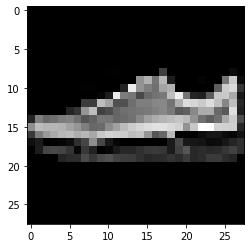

In [ ]:
plt.imshow(x_test[i])

In [ ]:
type(x_test[i])

numpy.ndarray

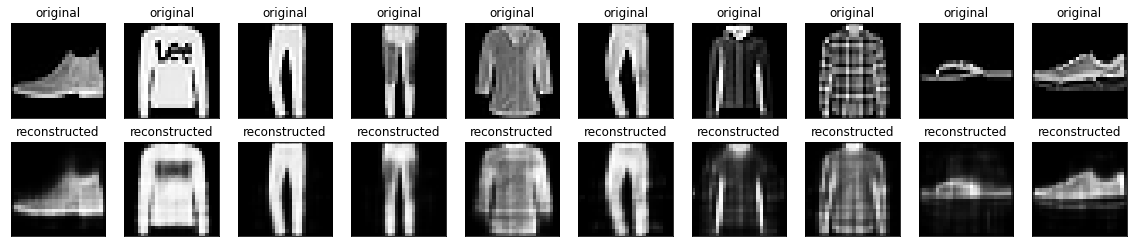

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_shape=(4,7,28,28,3)
x=tf.random.normal(input_shape)
#print(x)

In [ ]:
from PIL import Image
import glob
import os

path='/content/train'
for infile in glob.glob(os.path.join(path,"*.jpg")):
  im=Image.open(infile)

In [ ]:
X_train, X_test, _, _ = train_test_split(im, im, test_size=0.33)

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [ ]:
X_train.shape,X_test.shape

((357, 800, 3), (176, 800, 3))

In [ ]:
type(X_train[i])

numpy.ndarray

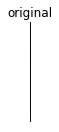

In [ ]:
 ax = plt.subplot(2, n, i + 1)
plt.imshow(X_train[1])
plt.title("original")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#plt.imshow(X_train[0])
#plt.show()

In [ ]:
(X_train,_),(X_test,_)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [ ]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

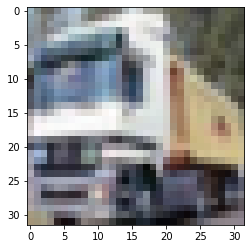

In [ ]:
plt.imshow(X_train[1])

In [ ]:
latent_dim=64
class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder,self).__init__()
    self.encoder=tf.keras.Sequential([
        layers.Flatten(),layers.Dense(latent_dim,activation='relu'),
    ])
    self.decoder=tf.keras.Sequential([
        layers.Dense(3072,activation='sigmoid'),
        layers.Reshape((32,32,3))
    ])
  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded
autoencoder1=Autoencoder(latent_dim)

In [ ]:
autoencoder1.compile(optimizer='adam',loss=losses.MeanSquaredError())


In [ ]:
autoencoder1.fit(X_train,X_train,epochs=10,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0255 - val_loss: 0.0238
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0232 - val_loss: 0.0228
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0227 - val_loss: 0.0228
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0227 - val_loss: 0.0226
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0226 - val_loss: 0.0226
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - 

In [ ]:
encoded_imgs = autoencoder1.encoder(X_test).numpy()
decoded_imgs = autoencoder1.decoder(encoded_imgs).numpy()

ValueError: ignored

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()